In [149]:
import prometheus_api_client as pac
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timezone
from dateutil import tz
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
from matplotlib.ticker import FormatStrFormatter

In [94]:
prom = pac.PrometheusConnect(url="http://localhost:9090", disable_ssl=True)

In [154]:
target_metric_ist = [{
        'name': 'go_memstats_frees_total',
        'unit': 'MB',
        'coefficient': 1e-6,
    },
    {
        'name': 'go_memstats_alloc_bytes',
        'unit': 'MB',
        'coefficient': 1e-6,      
    },
    {
        'name': 'net_conntrack_dialer_conn_established_total',
        'unit': '',
        'coefficient': 1,      
    }
]

[{'name': 'go_memstats_frees_total', 'unit': 'MB', 'coefficient': 1e-06},
 {'name': 'go_memstats_alloc_bytes', 'unit': 'MB', 'coefficient': 1e-06},
 {'name': 'net_conntrack_dialer_conn_established_total',
  'unit': '',
  'coefficient': 1}]

In [146]:
today = datetime.utcnow().date()
start = datetime(today.year, today.month, today.day - 1)
end = datetime(today.year, today.month, today.day)

datetime.datetime(2020, 12, 14, 0, 0)

<Figure size 432x288 with 0 Axes>

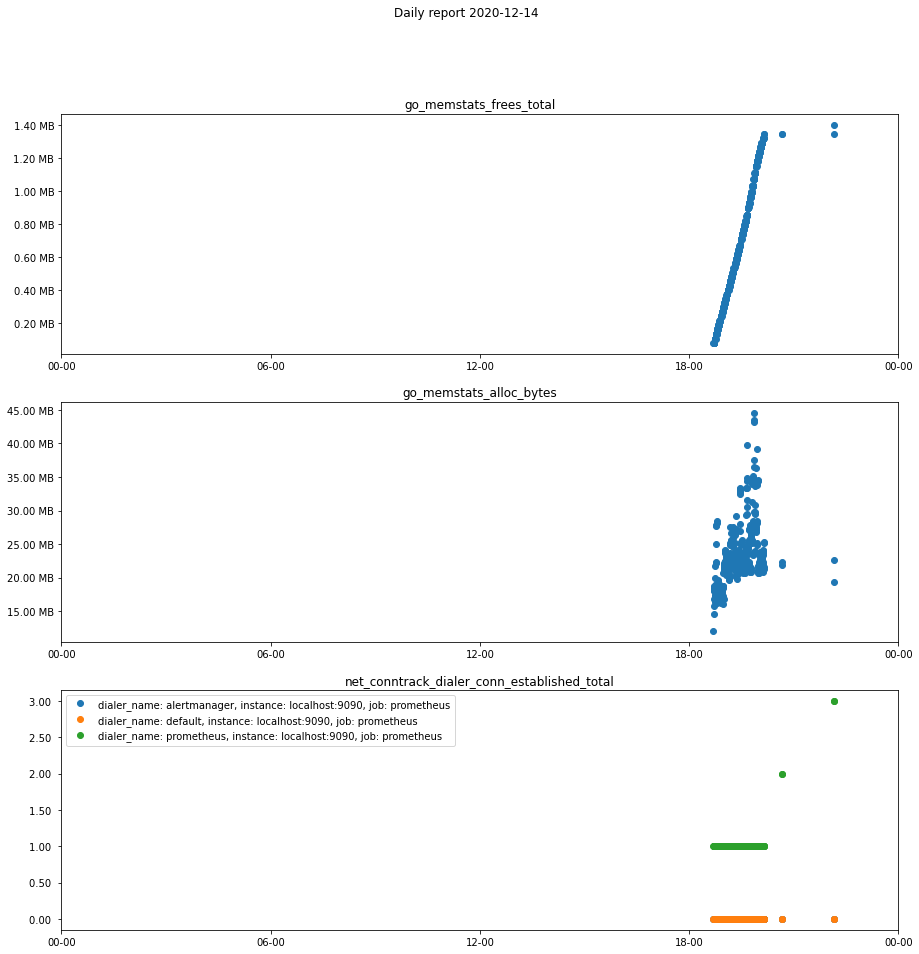

In [167]:
plt.clf()
fig, axs = plt.subplots(len(target_metric_ist), 1, figsize=(15, 15))
plt.suptitle('Daily report ' + today.strftime('%Y-%m-%d'))
for i, target_metric in enumerate(target_metric_ist):
    metric_name = target_metric['name']
    metric_data = prom.get_metric_range_data(
        metric_name=metric_name,
        start_time=start,
        end_time=end,
    )
    legends = []
    ax = axs[i]
    for metric_datum in metric_data:
        label = ', '.join([f'{pair[0]}: {pair[1]}'  for pair in metric_datum['metric'].items() if pair[0] != '__name__'])
        xdata = []
        ydata = []
        for point in metric_datum['values']:
            xdata.append(datetime.fromtimestamp(point[0]))
            ydata.append(float(point[1]) * target_metric['coefficient'])     
        ax.plot_date(np.array(xdata), np.array(ydata))
        ax.set_xlim(start, end)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f ' + target_metric['unit']))
        ax.xaxis.set_major_locator(HourLocator(arange(0, 25, 6)))
        ax.xaxis.set_major_formatter(DateFormatter('%H-%M'))
        legends.append(label)
    if(len(legends) > 1):
        ax.legend(labels=legends)
    ax.set_title(metric_name)

datetime.date(2020, 12, 14)

In [120]:
prom.get_metric_range_data(
        metric_name='go_memstats_frees_total',
        start_time=start,
        end_time=end,
    )

[{'metric': {'__name__': 'go_memstats_frees_total',
   'instance': 'localhost:9090',
   'job': 'prometheus'},
  'values': [[1607852515.585, '76191'],
   [1607852530.585, '76598'],
   [1607852545.585, '76958'],
   [1607852560.585, '77304'],
   [1607852575.585, '77672'],
   [1607852590.485, '78027'],
   [1607852605.585, '78364'],
   [1607852620.451, '78797'],
   [1607852635.585, '101428'],
   [1607852650.585, '101745'],
   [1607852665.417, '102203'],
   [1607852680.585, '102460'],
   [1607852695.585, '102838'],
   [1607852710.585, '103234'],
   [1607852725.585, '103737'],
   [1607852740.585, '104710'],
   [1607852755.585, '131930'],
   [1607852770.28, '132416'],
   [1607852785.585, '132962'],
   [1607852800.585, '133536'],
   [1607852815.246, '134014'],
   [1607852830.212, '134483'],
   [1607852845.212, '135053'],
   [1607852860.585, '135441'],
   [1607852875.585, '160914'],
   [1607852890.585, '161403'],
   [1607852905.585, '161889'],
   [1607852920.585, '162375'],
   [1607852935.109, '

In [119]:
end

datetime.datetime(2020, 12, 14, 0, 0)

array([ 0,  6, 12, 18, 24])